In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

C:\Users\USER PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [4]:
#Task 0: Data Exploration & Preprocessing
#1. Load the Dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Original X_train shape:", X_train.shape)
print("Original X_test shape:", X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Original X_train shape: (60000, 28, 28)
Original X_test shape: (10000, 28, 28)


In [5]:
#2. Normalize Pixel Values (0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
#3. Flatten Images (28×28 → 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("Before flattening:", X_train.shape)
print("After flattening:", X_train_flat.shape)

Before flattening: (60000, 28, 28)
After flattening: (60000, 784)


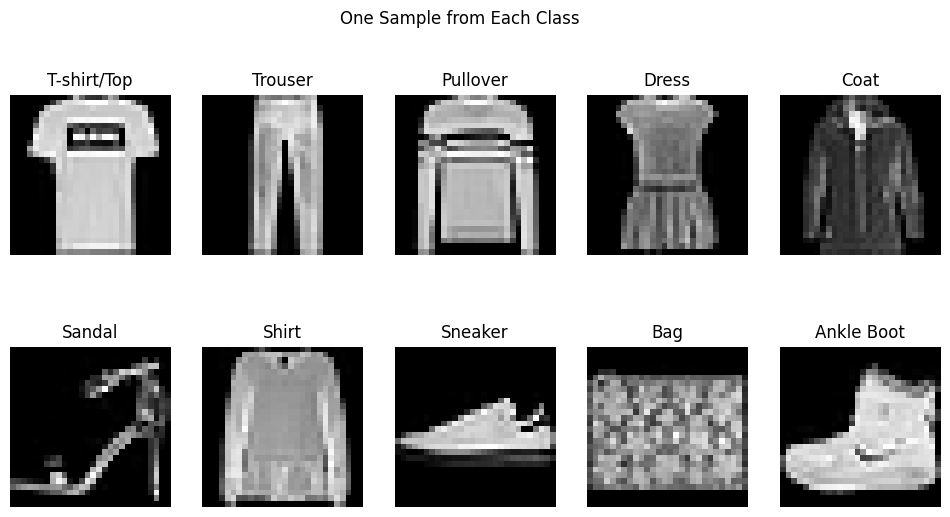

In [7]:
#4. Visualize One Image per Class
class_names = [
    "T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

plt.figure(figsize=(12, 6))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap="gray")
    plt.title(class_names[i])
    plt.axis("off")
plt.suptitle("One Sample from Each Class")
plt.show()

In [8]:
#Task 1: The Shallow Baseline Model
#1. Model Architecture
baseline_model = Sequential([
    Input(shape=(784,)),
    Dense(32, activation="sigmoid"),
    Dense(10, activation="softmax")
])

In [9]:
#2. Compile & Train
baseline_model.compile(
    optimizer=SGD(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_baseline = baseline_model.fit(
    X_train_flat, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5859 - loss: 1.5772 - val_accuracy: 0.7144 - val_loss: 1.1271
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7297 - loss: 0.9671 - val_accuracy: 0.7477 - val_loss: 0.8443
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7560 - loss: 0.7887 - val_accuracy: 0.7668 - val_loss: 0.7308
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7716 - loss: 0.7036 - val_accuracy: 0.7803 - val_loss: 0.6689
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7859 - loss: 0.6506 - val_accuracy: 0.7918 - val_loss: 0.6247
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7955 - loss: 0.6125 - val_accuracy: 0.8020 - val_loss: 0.5937
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8049 - loss: 0.5828 - val_accuracy: 0.8074 - val_loss: 0.5677
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8119 - loss: 0.5590 -

In [10]:
#3. Test Accuracy
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(
    X_test_flat, y_test, verbose=0
)

print("Baseline Test Accuracy:", baseline_test_acc)

Baseline Test Accuracy: 0.8129000067710876


In [12]:
#Task 2: Going Deeper & Wider
#1. Deep Model Architecture
deep_model = Sequential([
    Input(shape=(784,)),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

In [13]:
#2. Compile with Adam Optimizer
deep_model.compile(
    optimizer=Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [14]:
#3. Train (20 Epochs)
history_deep = deep_model.fit(
    X_train_flat, y_train,
    epochs=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8217 - loss: 0.4889 - val_accuracy: 0.8527 - val_loss: 0.4023
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8629 - loss: 0.3732 - val_accuracy: 0.8473 - val_loss: 0.4170
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8755 - loss: 0.3358 - val_accuracy: 0.8734 - val_loss: 0.3518
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8842 - loss: 0.3089 - val_accuracy: 0.8727 - val_loss: 0.3549
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8913 - loss: 0.2906 - val_accuracy: 0.8673 - val_loss: 0.3837
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.8961 - loss: 0.2780 - val_accuracy: 0.8853 - val_loss: 0.3295
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9010 - loss: 0.2632 - val_accuracy: 0.8869 - val_loss: 0.3321
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9057 -

In [15]:
#4. Compare Accuracy
deep_test_loss, deep_test_acc = deep_model.evaluate(
    X_test_flat, y_test, verbose=0
)

print("Baseline Accuracy:", baseline_test_acc)
print("Deep Model Accuracy:", deep_test_acc)

Baseline Accuracy: 0.8129000067710876
Deep Model Accuracy: 0.8907999992370605


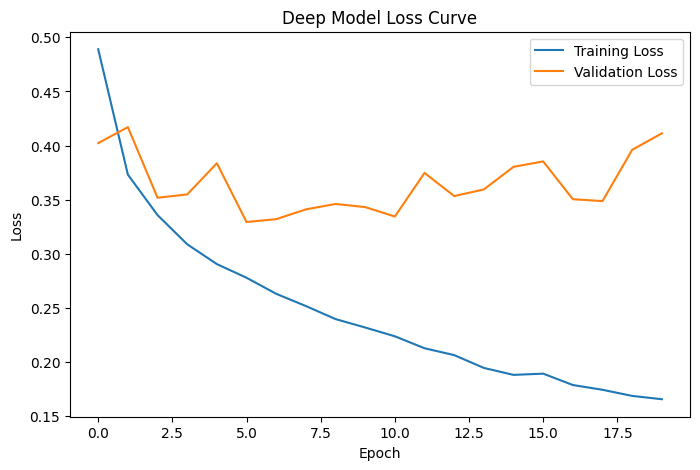

In [16]:
#Task 3: Fighting Overfitting
#1. Plot Training vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history_deep.history["loss"], label="Training Loss")
plt.plot(history_deep.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Deep Model Loss Curve")
plt.legend()
plt.show()

In [17]:
#2. Deep Model with Dropout
regularized_model = Sequential([
    Input(shape=(784,)),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])

In [18]:
#3. Early Stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

In [19]:
#4. Retrain
regularized_model.compile(
    optimizer=Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_reg = regularized_model.fit(
    X_train_flat, y_train,
    epochs=30,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7769 - loss: 0.6214 - val_accuracy: 0.8521 - val_loss: 0.4193
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8341 - loss: 0.4613 - val_accuracy: 0.8546 - val_loss: 0.3940
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.8485 - loss: 0.4230 - val_accuracy: 0.8540 - val_loss: 0.4024
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8556 - loss: 0.4021 - val_accuracy: 0.8722 - val_loss: 0.3593
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.8620 - loss: 0.3817 - val_accuracy: 0.8692 - val_loss: 0.3546
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8659 - loss: 0.3726 - val_accuracy: 0.8748 - val_loss: 0.3531
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.8704 - loss: 0.3605 - val_accuracy: 0.8775 - val_loss: 0.3367
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8718 -

In [20]:
#Task 4: Forensic Error Analysis
#1. Confusion Matrix
y_pred = np.argmax(regularized_model.predict(X_test_flat), axis=1)

cm = confusion_matrix(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


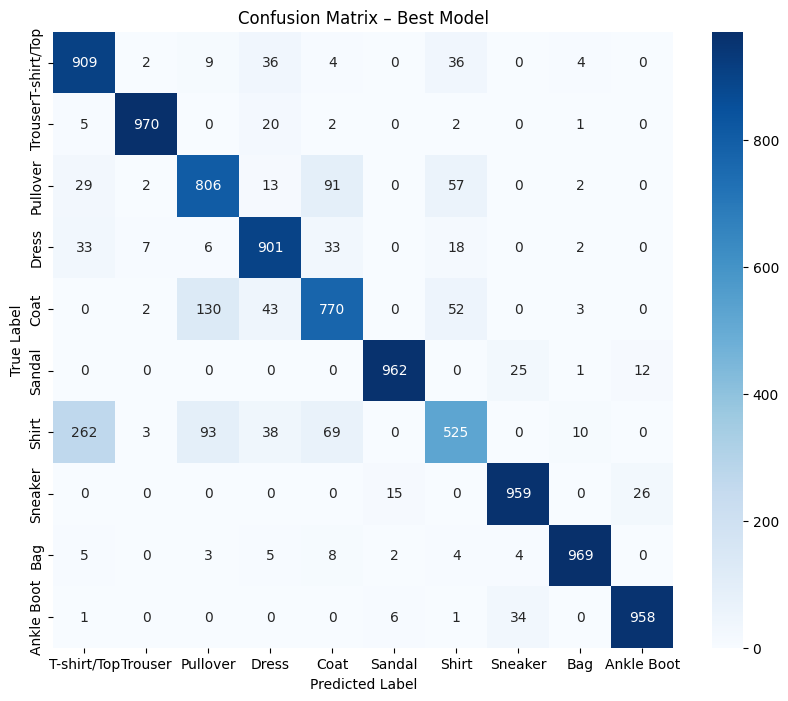

In [21]:
#2. Heatmap Visualization
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Best Model")
plt.show()

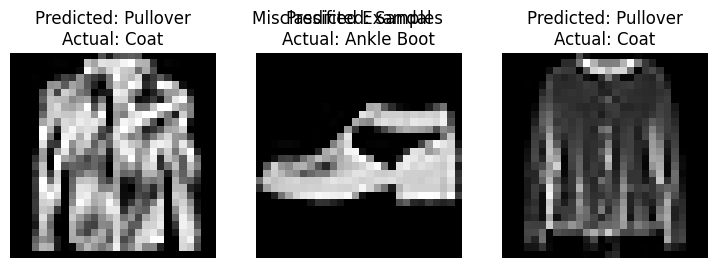

In [23]:
#4. Misclassified Images (Visual Proof)
misclassified = np.where(y_pred != y_test)[0][:3]

plt.figure(figsize=(9,3))
for i, idx in enumerate(misclassified):
    plt.subplot(1,3,i+1)
    plt.imshow(X_test[idx], cmap="gray")
    plt.title(f"Predicted: {class_names[y_pred[idx]]}\nActual: {class_names[y_test[idx]]}")
    plt.axis("off")
plt.suptitle("Misclassified Examples")
plt.show()

In [24]:
#Bonus: Batch Size Experiment
import time

for batch_size in [32, 1024]:
    start = time.time()
    
    model = Sequential([
        Input(shape=(784,)),
        Dense(512, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax")
    ])
    
    model.compile(
        optimizer=Adam(),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    model.fit(
        X_train_flat, y_train,
        epochs=10,
        batch_size=batch_size,
        verbose=0
    )
    
    _, acc = model.evaluate(X_test_flat, y_test, verbose=0)
    elapsed = time.time() - start
    
    print(f"Batch Size {batch_size} | Accuracy: {acc:.4f} | Time: {elapsed:.2f}s")

Batch Size 32 | Accuracy: 0.8862 | Time: 715.05s
Batch Size 1024 | Accuracy: 0.8836 | Time: 45.89s


Final Conclusion:
This project demonstrated that deep fully connected networks, when properly regularized with Dropout and Early Stopping,
can achieve strong performance on Fashion MNIST even under edge-device constraints. Error analysis confirmed known ambiguities between 
visually similar clothing classes.